In [1]:
import ciw
import ciw_sd_in_des
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def run_trial(trial, number_servers):
    results = {}
    
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(2)],
        service_distributions=[ciw_sd_in_des.Treatment()],
        number_of_servers=[number_servers])
    
    ciw.seed(trial)
    
    Q = ciw_sd_in_des.HybridSimulation(network=N, tracker=ciw.trackers.SystemPopulation())
    Q.simulate_until_max_time(365*3, 50000)
    recs = pd.DataFrame(Q.get_all_records())
    success_rate = (recs[(recs['arrival_date'] >= 365) & (recs['arrival_date'] <= 2*365)]['service_time'] == 0).mean()
    
    return success_rate, Q.statetracker.history

In [3]:
r20, history20 = run_trial(0, 20)
r35, history35 = run_trial(0, 35)

Between black lines is the observation period, the system reaches some form of steady state.

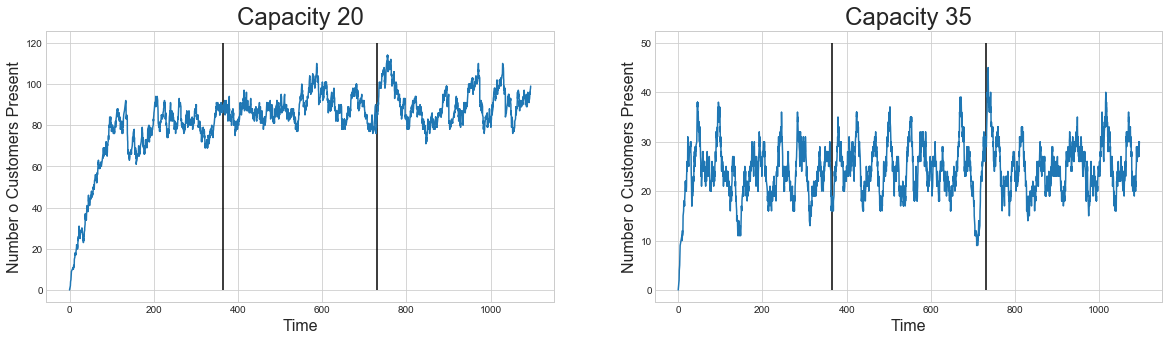

In [4]:
fig, axarr = plt.subplots(1, 2, figsize=(20,5))
axarr[0].plot([row[0] for row in history20], [row[1] for row in history20])
axarr[0].set_title('Capacity 20', fontsize=24)
axarr[0].set_xlabel('Time', fontsize=16)
axarr[0].set_ylabel('Number o Customers Present', fontsize=16)
axarr[0].vlines([365, 2*365], 0, 120)
axarr[1].plot([row[0] for row in history35], [row[1] for row in history35])
axarr[1].set_title('Capacity 35', fontsize=24)
axarr[1].set_xlabel('Time', fontsize=16)
axarr[1].set_ylabel('Number o Customers Present', fontsize=16)
axarr[1].vlines([365, 2*365], 0, 50)

In [5]:
r20, r35

(0.4654939106901218, 0.0)

# Change capacities from 20 to 30

In [6]:
results = {}
for c in tqdm.tqdm_notebook(range(20, 36)):
    results[c] = []
    for trial in tqdm.tqdm_notebook(range(20)):
        r = run_trial(trial, c)[0]
        results[c].append(r)

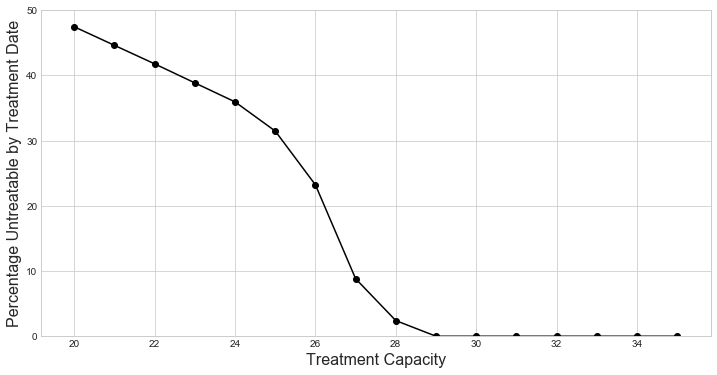

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_ylim(0, 50)
ax.plot(range(20, 36), [sum(results[c]) / len(results[c]) * 100 for c in range(20, 36)], c='black')
ax.scatter(range(20, 36), [sum(results[c]) / len(results[c]) * 100 for c in range(20, 36)], c='black')
ax.set_xlabel('Treatment Capacity', fontsize=16)
ax.set_ylabel('Percentage Untreatable by Treatment Date', fontsize=16)
fig.savefig('../tex/img/sdindes_capacity_vs_treatable.pdf')